In [1]:
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
import pandas as pd
from api_key import api_key
from pprint import pprint
import yfinance as yf
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

#Adding in all dependencies

In [2]:
#Here I create a master dictionary, a dict of dicts of lists. This allows me to have good lookup ability later on.

master_dict = {
    'UNH':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'HUM':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'ANTM':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'CI':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    'CNC':{
        'Dates':[],
        'Revenue':[],
        'Stock Price':[]},
    
    }

#Here I'm setting up all companies, 

companies = ['UNH','HUM','ANTM','CI','CNC']

for company in companies:
    url = f"https://financialmodelingprep.com/api/v3/income-statement/{company}\
?period=quarter&limit=5&apikey={api_key}"
    try:
        response = requests.get(url).json()
    except:
        print ("Sorry, we don't have this ticker: " + company)
    for i in range(0,5):
            master_dict[company]['Dates'].append(response[i]['date'])
            master_dict[company]['Revenue'].append(response[i]['revenue'])

pprint (master_dict)

{'ANTM': {'Dates': ['2020-09-30',
                    '2020-06-30',
                    '2020-03-31',
                    '2019-12-31',
                    '2019-09-30'],
          'Revenue': [31158000000,
                      29264000000,
                      29621000000,
                      27407000000,
                      26674000000],
          'Stock Price': []},
 'CI': {'Dates': ['2020-09-30',
                  '2020-06-30',
                  '2020-03-31',
                  '2019-12-31',
                  '2019-09-30'],
        'Revenue': [40955000000,
                    39042000000,
                    38050000000,
                    37890000000,
                    38207000000],
        'Stock Price': []},
 'CNC': {'Dates': ['2020-09-30',
                   '2020-06-30',
                   '2020-03-31',
                   '2019-12-31',
                   '2019-09-30'],
         'Revenue': [29090000000,
                     27712000000,
                     26025000000,


In [3]:
tickerdf = yf.download(tickers = companies,period = '2y',group_by = 'ticker',auto_adjust = True)

cncdf = tickerdf['CNC'].reset_index(drop=False)
unhdf = tickerdf['UNH'].reset_index(drop=False)
humdf = tickerdf['HUM'].reset_index(drop=False)
antmdf = tickerdf['ANTM'].reset_index(drop=False)
cidf = tickerdf['CI'].reset_index(drop=False)

dates = ['9/30/2019','12/31/2019','3/31/2020','6/30/2020','9/30/2020']

cncdf = cncdf.loc[cncdf['Date'].isin(dates)]
unhdf = unhdf.loc[unhdf['Date'].isin(dates)]
humdf = humdf.loc[humdf['Date'].isin(dates)]
antmdf = antmdf.loc[antmdf['Date'].isin(dates)]
cidf = cidf.loc[cidf['Date'].isin(dates)]

def add_stock(df,company):
    for item in list(df['Open']):
        master_dict[company]['Stock Price'].append(item)

add_stock(cncdf,'CNC')
add_stock(unhdf,'UNH')
add_stock(humdf,'HUM')
add_stock(antmdf,'ANTM')
add_stock(cidf,'CI')


[*********************100%***********************]  5 of 5 completed


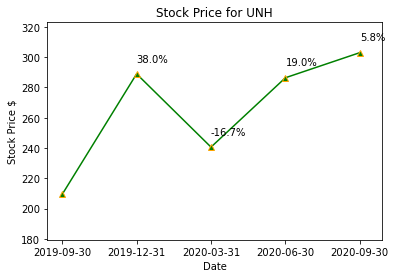

<Figure size 1080x1080 with 0 Axes>

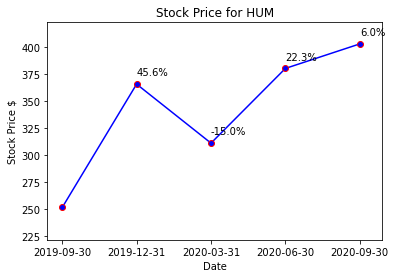

<Figure size 1080x1080 with 0 Axes>

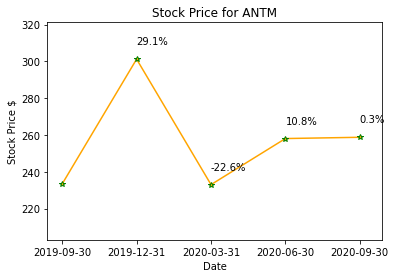

<Figure size 1080x1080 with 0 Axes>

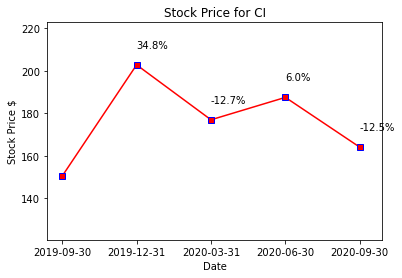

<Figure size 1080x1080 with 0 Axes>

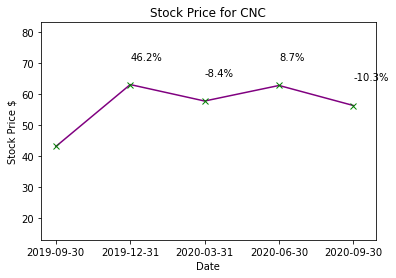

<Figure size 1080x1080 with 0 Axes>

In [40]:
colors = ['green','blue','orange','red','purple']
colors2 = ['orange','red','green','blue','green']
markers = ['^','o','*','s','x']

def plot_graph(ticker,i):
    fig = plt.figure()
    xaxis = sorted(master_dict[ticker]['Dates'],reverse=False)
    yaxis = master_dict[ticker]['Stock Price']
    plt.plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plt.xlabel('Date')
    plt.ylabel(f'Stock Price $')
    plt.title(f'Stock Price for {ticker}')
    z = 0
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        plt.annotate(
            s = change,
            xy = (x,y),
            xytext = (x,(y + 8))
        )
        z = z + 1
    plt.ylim(min(yaxis) - 30,max(yaxis) + 20)
    plt.xlim(-.2,4.3)
    plt.figure(figsize=(15,15))
    return fig

fig1 = plot_graph(companies[0], 0)
fig2 = plot_graph(companies[1], 1)
fig3 = plot_graph(companies[2], 2)
fig4 = plot_graph(companies[3], 3)
fig5 = plot_graph(companies[4], 4)

(-5000.0, 75000.0)

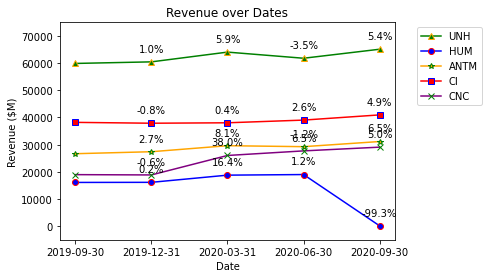

In [41]:
def plot_graph2(ticker,i):
    xaxis = sorted(master_dict[ticker]['Dates'],reverse=False)
    yaxis = list(master_dict[ticker]['Revenue'])
    yaxis.reverse()
    for j in range (0,5):
        yaxis[j] = float(yaxis[j]) / 1000000
    plt.plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plt.xlabel('Date')
    plt.ylabel(f'Revenue ($M)')
    plt.title(f'Revenue over Dates')
    z = 0
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        plt.annotate(
            s = change,
            xy = (x,y),
            textcoords="offset points", 
            xytext=(0,10),
            ha='center'
        )
        z = z + 1

i = 0    
for name in companies:
    plot_graph2(name, i)
    i = i + 1

plt.legend(companies,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-5000,75000)

In [ ]:
app = dash.Dash(__name__)
app.layout = html.Div(children=[
    html.H1(children='Stock price and Revenue'),

    html.Div(children='''
        Last 5 quarters for 5 insurance companies.
    '''),

    dcc.Graph(
        id='graph1',
        figure=fig1
    ),
    dcc.Graph(
        id='graph2',
        figure=fig2
    ),
    dcc.Graph(
        id='graph3',
        figure=fig3
    ),
    dcc.Graph(
        id='graph4',
        figure=fig4
    ),
    dcc.Graph(
        id='graph5',
        figure=fig5
    )
])

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Dec/2020 19:14:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Dec/2020 19:14:29] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-layout [GET]
Traceback (most recent call last):
  File "C:\Users\stodd\anaconda3\envs\ComeOnBaby\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\stodd\anaconda3\envs\ComeOnBaby\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\stodd\anaconda3\envs\ComeOnBaby\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\stodd\anaconda3\envs\ComeOnBaby\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\stodd\anaconda3\envs\ComeOnBaby\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\stodd\anaconda3\envs\ComeOnBaby\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\stodd

127.0.0.1 - - [15/Dec/2020 19:14:29] "GET /_dash-layout HTTP/1.1" 500 -
